# STAT207 Mini-Project #1 - __The Relationship Between the Number of Absences and the GPA for Different Tutoring Status__


Pitupoom Soontornthanon

In [15]:
#Imports here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 1. Introduction

This project is conducted to explore how the nature of relationship between `the number of absences` and `the Grade Point Average (GPA)` change for different values of `tutoring status` in the dataset. Some people might think that skipping classes but going to a tutoring center is acceptable and does not pose an obstacle to obtaining a good GPA in the high school. To clarify this doubt, an analysis must be conducted.

Understanding this relationship enables high school teachers, educational policymakers, and school administrators to enact suitable policies and better allocate resources to enhance students' learning. In addition, it provides insights to students themselves regarding the effects of skipping classes and attending tutoring sessions on their GPA. Understanding how absences and tutoring impact GPA may encourage students to attend classes more consistently and seek tutoring support when necessary.

## 2. Dataset Discussion

The dataset that will be explored in this project is `Students Performance Dataset` where it can be found from the `Kaggle` website (`https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset`). The dataset was downloaded on February 10th, 2025. This dataset contains comprehensive information on 2,392 high school students, detailing their demographics, study habits, parental involvement, extracurricular activities, and academic performance. Since the original author only mentioned that the dataset was collected from high school students, but not where and how it was collected, the dataset and hence the analysis might represent students from specific regions only. Therefore, further research based on your location might be needed to understand the full context of the relationship. In this analysis, the three variables that will be explored include `Absences`, which represents the number of absences during the school year, `GPA`, which represents the Grade Point Average, and `Tutoring`, which represents the tutoring status where 0 indicates a student does not go to a tutoring center and 1 indicates a student goes to a tutoring center.

In [29]:
df = pd.read_csv('Student_Performance_Data.csv')
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [30]:
rows = df.shape[0]
print(f'There are {rows} rows in the original datasets.')

There are 2392 rows in the original datasets.


## 3. Dataset Cleaning

In this dataset, there are no implicit or explicit missing values. Also, since every distinct value of `Tutoring` has at least 10 observations (`0` has 1,671 observations and `1` has 721 observations), no row has been dropped. Furthermore, since the boxplots for `Absences` and `GPA` do not have any outliers, no row has been dropped. With respect to the scatterplot between `Absences` and `GPA`, there is no outstanding outlier; hence, no row has been dropped. While visualizing the dataset, I have not discovered any other data cleaning ideas that might help clarify the answer to the research question. Every visualization looks good to me. Thus, I have not dropped any row.

In [31]:
np.unique(df['Absences'].values)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [34]:
np.set_printoptions(threshold=np.inf)
np.unique(df['GPA'].values)

array([0.        , 0.01206349, 0.01979849, 0.02115558, 0.02646866,
       0.02781862, 0.08157318, 0.09465159, 0.10059215, 0.11260225,
       0.11263506, 0.11523185, 0.11524321, 0.12593307, 0.12930675,
       0.13065424, 0.13616591, 0.14706887, 0.15259078, 0.15303181,
       0.15500479, 0.16511062, 0.17046361, 0.18425149, 0.18981806,
       0.19262511, 0.19474328, 0.1969011 , 0.19992738, 0.20014553,
       0.20506796, 0.21097918, 0.21119422, 0.2123671 , 0.2143195 ,
       0.21457009, 0.21704201, 0.21828486, 0.22343051, 0.23334988,
       0.23649722, 0.24162563, 0.24329809, 0.24762677, 0.24897713,
       0.26147226, 0.26286117, 0.26492416, 0.26972086, 0.27008855,
       0.27011031, 0.27319093, 0.2759351 , 0.27821546, 0.27834757,
       0.28067031, 0.28611004, 0.28657129, 0.28786732, 0.29990755,
       0.29995191, 0.30437203, 0.30759406, 0.31066953, 0.31247958,
       0.31254623, 0.31675597, 0.31885091, 0.32183143, 0.32228608,
       0.32264183, 0.3280857 , 0.33096691, 0.33315423, 0.33657

In [35]:
np.unique(df['Tutoring'].values)

array([0, 1])

In [60]:
df_tutoring = df.groupby('Tutoring').agg('count').reset_index()
df_tutoring = df_tutoring[['Tutoring', 'StudentID']]
df_tutoring = df_tutoring.rename(columns={'StudentID': 'Count'})
df_tutoring

,Tutoring,Count
0,0,1671
1,1,721


C:\Users\pitup\AppData\Local\Temp\ipykernel_12420\1176480465.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df['Absences'], palette='Set2')


Text(0.5, 1.0, 'A Boxplot of the Number of Absences During the School Year (0-30)')

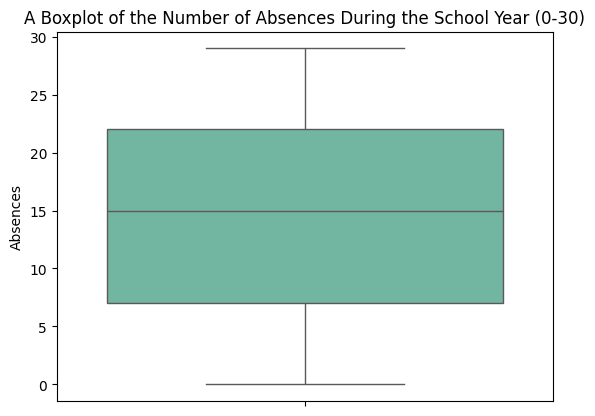

In [69]:
sns.boxplot(y=df['Absences'], palette='Set2')
plt.title('A Boxplot of the Number of Absences During the School Year (0-30)')

C:\Users\pitup\AppData\Local\Temp\ipykernel_12420\3005325205.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df['GPA'], palette='Set1')


Text(0.5, 1.0, 'A Boxplot of the GPA')

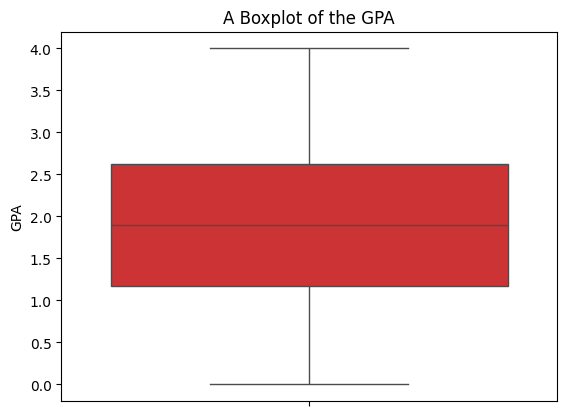

In [72]:
sns.boxplot(y=df['GPA'], palette='Set1')
plt.title('A Boxplot of the GPA')

Text(0.5, 0, 'The Number of Absences')

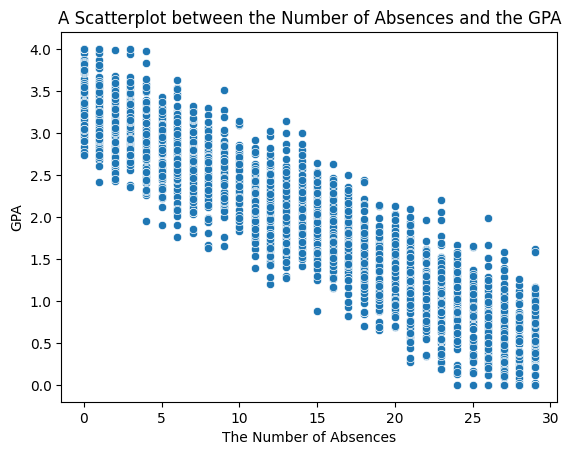

In [105]:
sns.scatterplot(data=df, x='Absences', y='GPA')
plt.title('A Scatterplot between the Number of Absences and the GPA')
plt.xlabel('The Number of Absences')

## 4. <u>Research Question</u>: How does the Relationship between `x` and `y` Change based on Different Values of `z` in the Dataset?

Our research question is: How the nature of relationship between `the number of absences` and `the Grade Point Average (GPA)` change for different values of `tutoring status` in the dataset.

__Summary Statistics__
1) _Direction changes_: The relationship between the number of absences and the GPA are negative for both tutoring status.
2) _Shape changes_: The shapes of the relationship between the number of absences and the GPA are both linear for both tutoring status.
3) _Strength changes_: The strength of the relationship between the number of absences and the GPA is slightly higher for those who go to a tutoring center than it is for those who do not go to a tutoring center.
4) _Outlier changes_: There are a few outliers for both types of tutoring status.
5) _Slope changes_: The slopes of the relationship between the number of absences and the GPA are nearly identical.
6) _Y-interception_: The y-interception between the number of absences and the GPA for those who go to a tutoring center is higher than it is for those who do not go to a tutoring center.

In conclusion, there are no differences between how the nature of relationship between `the number of absences` and `the Grade Point Average (GPA)` change for different values of `tutoring status`, except that those who attend a tutoring center tend to have _higher_ GPA than those who do not, provided they have the same number of absences.


 GPA than those who does not go to a tutoring center providing that the ones have the same number of absences.


In [118]:
df['Tutoring'] = df['Tutoring'].replace({0: 'No', 1: 'Yes'})

In [121]:
df[['Absences', 'GPA', 'Tutoring']].groupby('Tutoring').corr()

Absences       GPA
Tutoring                             
No       Absences  1.000000 -0.925489
         GPA      -0.925489  1.000000
Yes      Absences  1.000000 -0.930472
         GPA      -0.930472  1.000000

Text(0.5, 29.00000000000003, 'The Number of Absences')

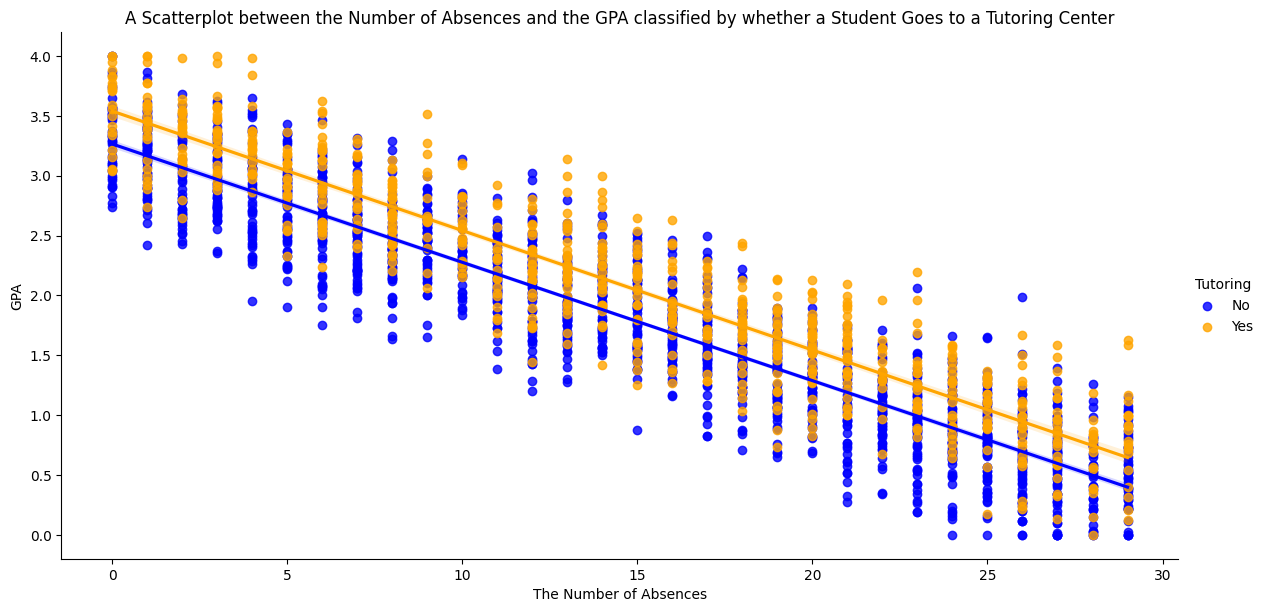

In [120]:
sns.lmplot(data=df, x='Absences', y='GPA', hue='Tutoring', hue_order=['No', 'Yes'], palette=['blue', 'orange'], height=6, aspect=2)
plt.title('A Scatterplot between the Number of Absences and the GPA classified by whether a Student Goes to a Tutoring Center')
plt.xlabel('The Number of Absences')

## 5. Conclusion

We conclude that the students who attend a tutoring center have higher GPA than those who do not go to a tutoring center. That being said, since the relationship between the number of absences and the GPA is negatively linear no matter what their tutoring status is, we can also imply that the fewer students skip classes, the higher their GPAs are.

However, some potential shortcomings to this analysis might exist. For instance, there might have been external factors or more obstacles for a group of students who do not go to a tutoring center than those who do. These factors include the disproportionate number of students with disabilities in each group (There might be more disabled students in the group of students who do not go to a tutoring center because they might find it hard to do so, thus lowering their GPA.). As a result, the analysis might exaggerate the difference between the GPA of these two groups.

Based on this shortcoming, I think, in the future, it might be better to break those with and without disabilities into two separate groups. This process is called 'stratification,' where we believe that disability is a confounding variable that might affect our interpretation.